In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('studfeedback.csv')

In [13]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [14]:
# Turn everything to ints
# Delete rows with Rating (Num) == "ERROR!"
df = df.drop([1310,1322,1411], axis=0)

# Change Rating (Num) data type to int
df["Rating (Num)"] = pd.to_numeric(df["Rating (Num)"])

### Promoters vs Detractors

In [15]:
prom = (df[df["Rating (Num)"] >= 9])
det = (df[df["Rating (Num)"] <= 6])
pas = df[(df["Rating (Num)"] >= 7) & (df["Rating (Num)"] <= 8)]
print('prom {} det {} pas {} '.format(len(prom), len(det), len(pas)))
len(prom) - len(det)
# There are 639 more promoters than detractors in 2017

prom 760 det 121 pas 569 


639

### Track boasts best promoters to detractors

In [16]:
df.Track.unique()

array(['Apps, Explorer', 'Apps', 'Games', nan, 'VR', 'Games, Explorer'],
      dtype=object)

In [17]:
apps = df[(df['Track'] == 'Apps, Explorer') | (df['Track'] == 'Apps')]
games = df[(df['Track'] == 'Games, Explorer') | (df['Track'] == 'Games')]
VR = df[(df['Track'] == 'VR')]
tracks = [apps, games, VR]

In [18]:
# TODO: GRAPH THIS


### Does student experience get better the longer they are enrolled at the summer academy

In [32]:
weeks = df.Week.unique()
means = {}
for week in sorted(weeks):
    df_week = (df[df['Week'] == week])
    means[week] = df_week['Rating (Num)'].mean()
means

{'Week 1': 8.26736111111111,
 'Week 2': 8.347826086956522,
 'Week 3': 8.522821576763485,
 'Week 4': 8.33160621761658,
 'Week 5': 8.441340782122905,
 'Week 6': 8.541666666666666,
 'Week 7': 8.6,
 'Week 8': 9.11111111111111}

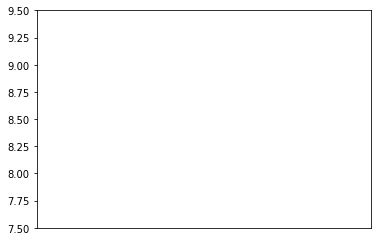

In [20]:
# TODO: Graph of this data
import matplotlib.pyplot as plt
plt.plot(range(len(means)), list(means.values()))
plt.xticks(range(len(means)), list(means.keys()))
plt.ylim(7.5, 9.5)
plt.show()

### Does student satisfaction very by location?

In [21]:
locs = df.Location.dropna().unique()
locs_dic = {}
for location in locs:
    df_loc = (df[df['Location'] == location])
    locs_dic[location] = df_loc['Rating (Num)'].mean()
locs_dic


{'San Francisco': 8.458333333333334,
 'Los Angeles': 8.773584905660377,
 'New York City': 8.275757575757575,
 'Redwood City': 8.327586206896552,
 'Santa Clara': 8.318407960199005,
 'Oakland': 8.53191489361702,
 'Washington DC': 8.170212765957446,
 'Chicago': 8.485714285714286,
 'Atlanta': 9.121212121212121,
 'Hong Kong': 7.181818181818182,
 'Beijing': 8.948717948717949,
 'Tokyo': 8.246153846153845}

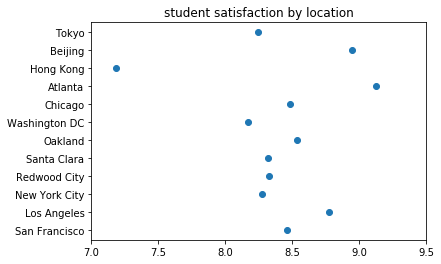

In [22]:
# Graph of this data
# plt.scatter(range(len(locs_dic)), list(locs_dic.values()))
# plt.scatter(range(len(locs_dic.keys())), list(locs_dic.values()))
# plt.xticks(range(len(locs_dic)), list(locs_dic.values()))
plt.scatter(list(locs_dic.values()), list(locs_dic.keys()))

# plt.ylim(7, 9.5)
plt.xlim(7, 9.5)
plt.title('student satisfaction by location')
plt.show()

### What sorts of information does this dataset contain?

In [23]:
df.head().dropna()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [24]:
# Do they offer all tracks everywhere

# What track has most satisfaction
# 


### total NPS Score

In [25]:
prom = (df[df["Rating (Num)"] >= 9])
det = (df[df["Rating (Num)"] <= 6])
pas = df[(df["Rating (Num)"] >= 7) & (df["Rating (Num)"] <= 8)]
print('prom {} det {} pas {} '.format(len(prom), len(det), len(pas)))

prom 760 det 121 pas 569 


In [26]:
nps = (len(prom) - len(det)) / (len(prom) + len(pas) + len(det))

In [27]:
nps

0.4406896551724138